# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky. 
* Načtěte si datasety intakes a outcomes z příslušných csv souborů. 
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category. 
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64. 
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik. 

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [1]:
# a teď už je to na vás 💪
# níže vložte své řešení

## Naimportujeme potřebné balíčky
* ```matplotlib.pyplot``` - na vykreslení grafů
* ```seaborn``` - na vykreslení grafů
* ```numpy``` - aby použivat ```np.array```
* ```pandas``` - pro prací s dataframem(načtení dat, práce s tabulkami atd.)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Načtěni datasetu
* Načtěme si datasety intakes a outcomes pomocí funkce ```pd.read_csv()```

In [3]:
intakes = pd.read_csv('intakes.csv')
outcomes = pd.read_csv('outcomes.csv')

## Seznámení s datasety
* pomocí ```.info()``` zjístíme datatypy sloupců v datasetech a počet NaN hodnot(pomocí ```.isnull().sum()```.
* pomocí ```.nunique()``` zjístíme počet unikatních hodnot ve sloupcích.
* použítím ```.head()``` můžeme zjístít jak v datasetu reprezentovany chybějící hodnoty a zjístime význam sloupců

### **Intakes**

In [4]:
display(intakes.isnull().sum())

Animal ID               0
Name                41269
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

In [5]:
display(intakes.info())
display(intakes.nunique())
display(intakes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


### **Outcomes**

In [6]:
display(outcomes.isnull().sum())

Animal ID               0
Name                41255
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

In [7]:
display(outcomes.info())
display(outcomes.nunique())
display(outcomes.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


### Poznamky ohledně datasetu
* ```MonthYear``` nedává smysl, protože máme ```DateTime```.
* Sloupec ```Name``` a ```Animal ID``` pro vyzkum potřebovát nejspíš nebudeme 
* Neznáme hodnoty jsou reprezentovány pomocí ```NaN```, proto už nemusíme je převádět.
* ```Found Location``` má příliš mnoho unikátních hodnot proto je taký těžko použitelný.
* ```Outcome Subtype``` má skoro 50% NaN hodnot, proto nebude použitelný a můžeme ho odstranit. 

## Příprava dat

* Odstraníme již zmíněné sloupce, které nemají pro nás význam.
* Převedeme všechny sloupce na typ ```category```.
* Vymažeme řádky s ```NaN``` hodnotami.
* Převedeme pomoci ```pd.to_datetime```  příznak DateTime na typ ```datetime64```

In [8]:
#drop wrong columns
intakes = intakes.drop(columns=["Animal ID", "Name", "MonthYear", "Found Location"])
outcomes = outcomes.drop(columns=["Animal ID", "Name", "MonthYear", "Outcome Subtype"])

#change all columns to category
outcomes = outcomes.astype('category')
intakes = intakes.astype('category')

#delete rows with NaN
outcomes = outcomes.dropna()
intakes = intakes.dropna()

#change DateTime column to datetime64 type
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'])
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'])

display(outcomes.info())
display(intakes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138740 entries, 0 to 138768
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DateTime          138740 non-null  datetime64[ns]
 1   Date of Birth     138740 non-null  category      
 2   Outcome Type      138740 non-null  category      
 3   Animal Type       138740 non-null  category      
 4   Sex upon Outcome  138740 non-null  category      
 5   Age upon Outcome  138740 non-null  category      
 6   Breed             138740 non-null  category      
 7   Color             138740 non-null  category      
dtypes: category(7), datetime64[ns](1)
memory usage: 3.9 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138584 entries, 0 to 138584
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DateTime          138584 non-null  datetime64[ns]
 1   Intake Type       138584 non-null  category      
 2   Intake Condition  138584 non-null  category      
 3   Animal Type       138584 non-null  category      
 4   Sex upon Intake   138584 non-null  category      
 5   Age upon Intake   138584 non-null  category      
 6   Breed             138584 non-null  category      
 7   Color             138584 non-null  category      
dtypes: category(7), datetime64[ns](1)
memory usage: 3.4 MB


None

* Pomocí funkce ```age_to_days``` převedeme sloupce ```Age upon Intake/Outcome```  na numericky typ. Všechny hodnoty budou reprezentovány v dnech.
* Pomocí ```str.split(" ")```(Mezi číslem a názvem vždy byla mezera, to jsem zjistil při seznámeni s datasetem na začátku úkolu) rozdělil jsem původní string na 2 kousky a využitím ```apply()``` použil jsem funkci na cely sloupec.

In [9]:
#convert date to days
def age_to_days(str_age):
    str_age[0] = pd.to_numeric(str_age[0]) 
    if(str_age[1] == "year" or str_age[1] == "years"):
        return str_age[0]*365
    if(str_age[1] == "month" or str_age[1] == "months"):
        return str_age[0]*30
    if(str_age[1] == "week" or str_age[1] == "weeks"):
        return str_age[0]*7
    else:
        return str_age[0]

intakes['Age upon Intake'] = intakes['Age upon Intake'].str.split(" ").apply(age_to_days)
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].str.split(" ").apply(age_to_days)
display(outcomes.head())
display(intakes.head())

,DateTime,Date of Birth,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,2019-05-08 18:20:00,05/02/2017,Rto-Adopt,Cat,Neutered Male,730,Domestic Shorthair Mix,Brown Tabby/White
1,2018-07-18 16:02:00,07/12/2017,Adoption,Dog,Neutered Male,365,Chihuahua Shorthair Mix,White/Brown
2,2020-08-16 11:38:00,08/16/2019,Euthanasia,Other,Unknown,365,Raccoon,Gray
3,2016-02-13 17:59:00,10/08/2015,Adoption,Dog,Neutered Male,120,Anatol Shepherd/Labrador Retriever,Buff
4,2014-03-18 11:47:00,03/12/2014,Transfer,Cat,Intact Male,6,Domestic Shorthair Mix,Orange Tabby


,DateTime,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,2019-01-03 16:19:00,Stray,Normal,Dog,Neutered Male,730,Beagle Mix,Tricolor
1,2015-07-05 12:59:00,Stray,Normal,Dog,Spayed Female,2920,English Springer Spaniel,White/Liver
2,2016-04-14 18:43:00,Stray,Normal,Dog,Intact Male,330,Basenji Mix,Sable/White
3,2013-10-21 07:59:00,Stray,Sick,Cat,Intact Female,28,Domestic Shorthair Mix,Calico
4,2014-06-29 10:38:00,Stray,Normal,Dog,Neutered Male,1460,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


* Trochu detailněji prozkoumáme Age upon Intake/Outcome. 
* Podle grafů můžeme říct, že příznaky obsahují záporné hodnoty.
* Použil jsem graf scatter s osami x a y. Pomocí osy x a y můžeme nahlédnout záporné hodnoty.

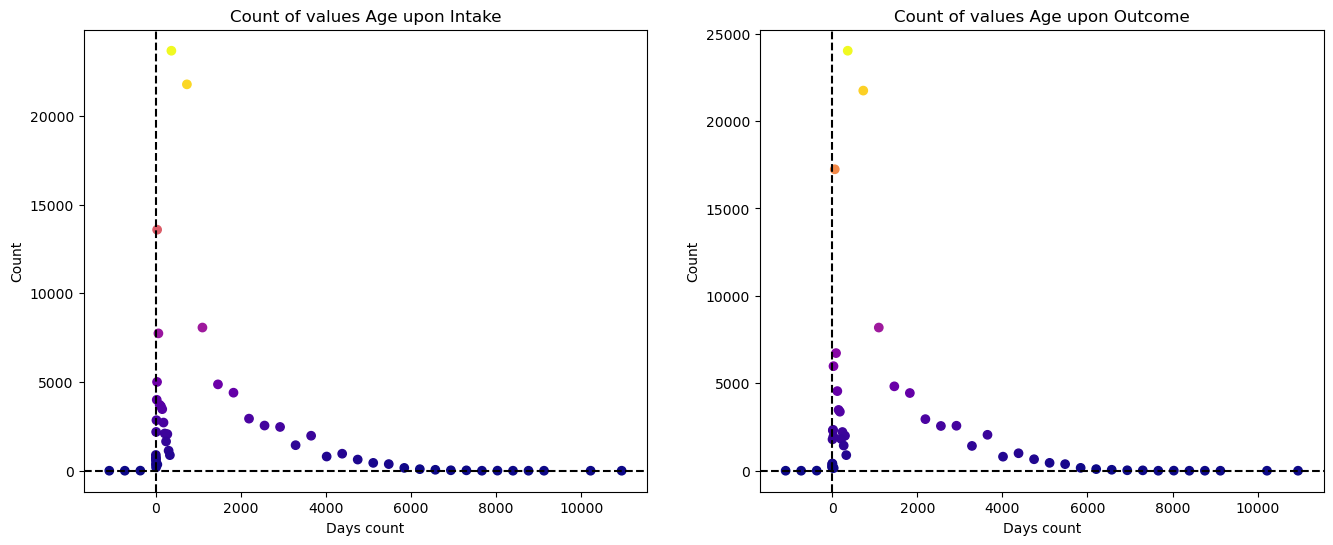

In [10]:
intake_age = intakes['Age upon Intake'].value_counts().rename_axis('days_count').reset_index(name='count') #set the name of the axis for the index
outcomes_age = outcomes['Age upon Outcome'].value_counts().rename_axis('days_count').reset_index(name='count') #reset_index add index to column and rename it

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6)) #create two parallel tabels

ax1.scatter(intake_age["days_count"], intake_age["count"],  c=intake_age["count"], cmap='plasma') #use plasma to make gradient
ax2.scatter(outcomes_age["days_count"], outcomes_age["count"],  c=outcomes_age["count"], cmap='plasma')

#add vertical line 
ax1.axvline(0, c='black', ls='--')
ax2.axvline(0, c='black', ls='--')
#add horizontal line 
ax1.axhline(0, c='black', ls='--')
ax2.axhline(0, c='black', ls='--')

#print names of x and y lines
ax1.set_xlabel("Days count")
ax1.set_ylabel("Count")
ax2.set_xlabel("Days count")
ax2.set_ylabel("Count")
  
# giving title to the plot
ax1.set_title("Count of values Age upon Intake")
ax2.set_title("Count of values Age upon Outcome")

plt.show()


* Odstraníme záporné hodnoty, protože parametr Age nemůže být záporný.

In [11]:
intakes = intakes[intakes['Age upon Intake'] >= 0]
outcomes = outcomes[outcomes['Age upon Outcome'] >= 0]

#  Deskriptivní statistiky

### Univariační deskriptivní statistiky

### Příznak ```DateTime```

⭐️ Popíšeme příznak ```DateTime``` s datasetu ```intakes``` pomocí univariačních deskriptivních statistik.

⭐️ DateTime je kvalitativní příznak, proto budeme zjišťovat četnost, relativní četnost a modus.

⭐️ Aby to dávalo smysl, vybereme z původního sloupce ```DateTime```  jenom rok a měsíc(den a čas dává příliš velký rozsah hodnot). Využitím ```value_counts()``` zjistíme četnost, a parametr ```normalize``` nastaveny na ```True``` řekne nám relativní četnost. Všechno to dáme do jednoho dataframu a pro usnadnění vizualizace vytvoříme nové sloupce ```year``` a ```month```.

In [12]:
month_year = pd.to_datetime(intakes['DateTime']).dt.to_period('M')

stats_intakes = pd.DataFrame({
       'Frequency': month_year.value_counts(),
       'Relative frequency': month_year.value_counts(normalize=True)
    })
stats_intakes['year']= stats_intakes.index.year
stats_intakes['month']= stats_intakes.index.month
display(stats_intakes)

,Frequency,Relative frequency,year,month
2015-06,2188,0.015789,2015,6
2019-05,2132,0.015385,2019,5
2015-05,2094,0.015111,2015,5
2019-06,2063,0.014887,2019,6
2016-05,2037,0.014700,2016,5
...,...,...,...,...
2020-12,647,0.004669,2020,12
2021-01,567,0.004092,2021,1
2020-05,483,0.003485,2020,5
2021-02,387,0.002793,2021,2


* Vizualizujeme to pomoci heatmapy. Na to vytvoříme funkci ```Freq_Year_Month``` ta se nám ještě bude hodit u jiné otázky.
* ```NaN``` hodnoty vyměníme na 0, aby se mohli použit heatmapu. Na to použijeme funkci ```fillna()```.

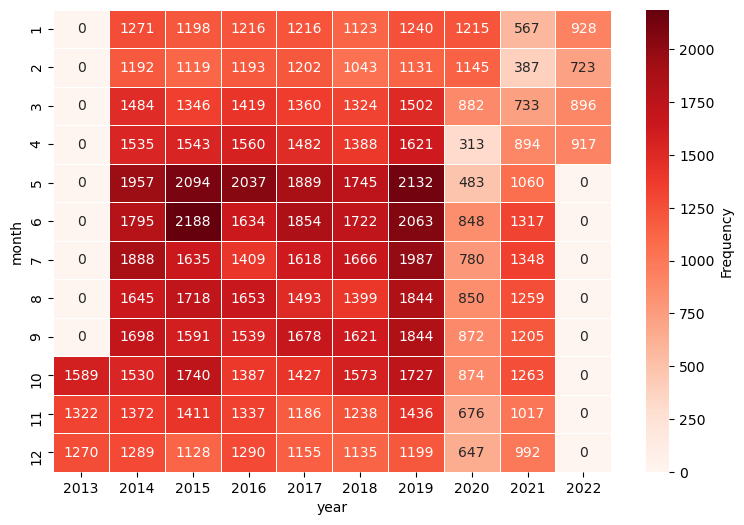

In [13]:
def Freq_Year_Month():
    date_freq= stats_intakes.pivot("month", "year", "Frequency")
    date_freq = date_freq.fillna(0)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(date_freq, annot=True, fmt=".0f", cmap="Reds", linewidth=.5, cbar_kws={'label': 'Frequency'})

Freq_Year_Month()

* Pomocí heatmapy vizualizujeme i relativní četnost.

<AxesSubplot:xlabel='year', ylabel='month'>

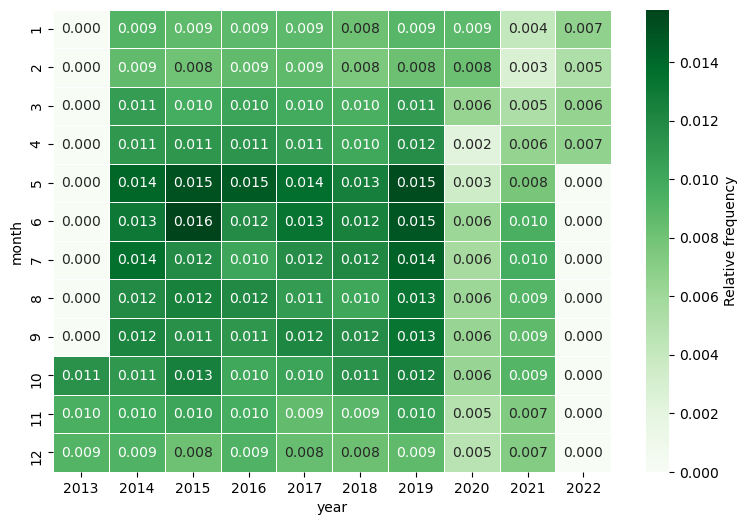

In [14]:
data_rel_freq = stats_intakes.pivot("month", "year", "Relative frequency")

data_rel_freq = data_rel_freq.fillna(0)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data_rel_freq, annot=True, fmt=".3f", cmap="Greens", linewidth=.5, cbar_kws={'label': 'Relative frequency'})

* Z heatmapy vidíme že největší četnost bude mít květen a červen roku 2015 a 2019.

* Modus je hodnota, která je v souboru dat zastoupena nejčastěji. Proto najdeme měsíc a rok který má největší frekvenci. V našem případě je to 2015-06.

In [15]:
modus = stats_intakes[stats_intakes['Frequency'] == stats_intakes['Frequency'].max()]
display(modus)

,Frequency,Relative frequency,year,month
2015-06,2188,0.015789,2015,6


### Příznak ```Age upon Intake```

* Příznak Age upon Intake je kvantitativní (numerický) proto potřebujeme zjistit průměr, medián, rozptyl, minimum a maximum.

In [16]:
age_stats = pd.DataFrame(
    np.array([
       ['Average', intakes['Age upon Intake'].mean()],
       ['Median', intakes['Age upon Intake'].median()],
       ['Var', intakes['Age upon Intake'].var()],
       ['Min', intakes['Age upon Intake'].min()],
       ['Max', intakes['Age upon Intake'].max()], 
       ]), columns = ['Title', 'Value'])
display(age_stats)

,Title,Value
0,Average,740.1493620829003
1,Median,365.0
2,Var,1088541.2173519146
3,Min,0
4,Max,10950


* Na vizualizací použijeme sloupcový graf. Využijeme na to balíček ```seaborn```.

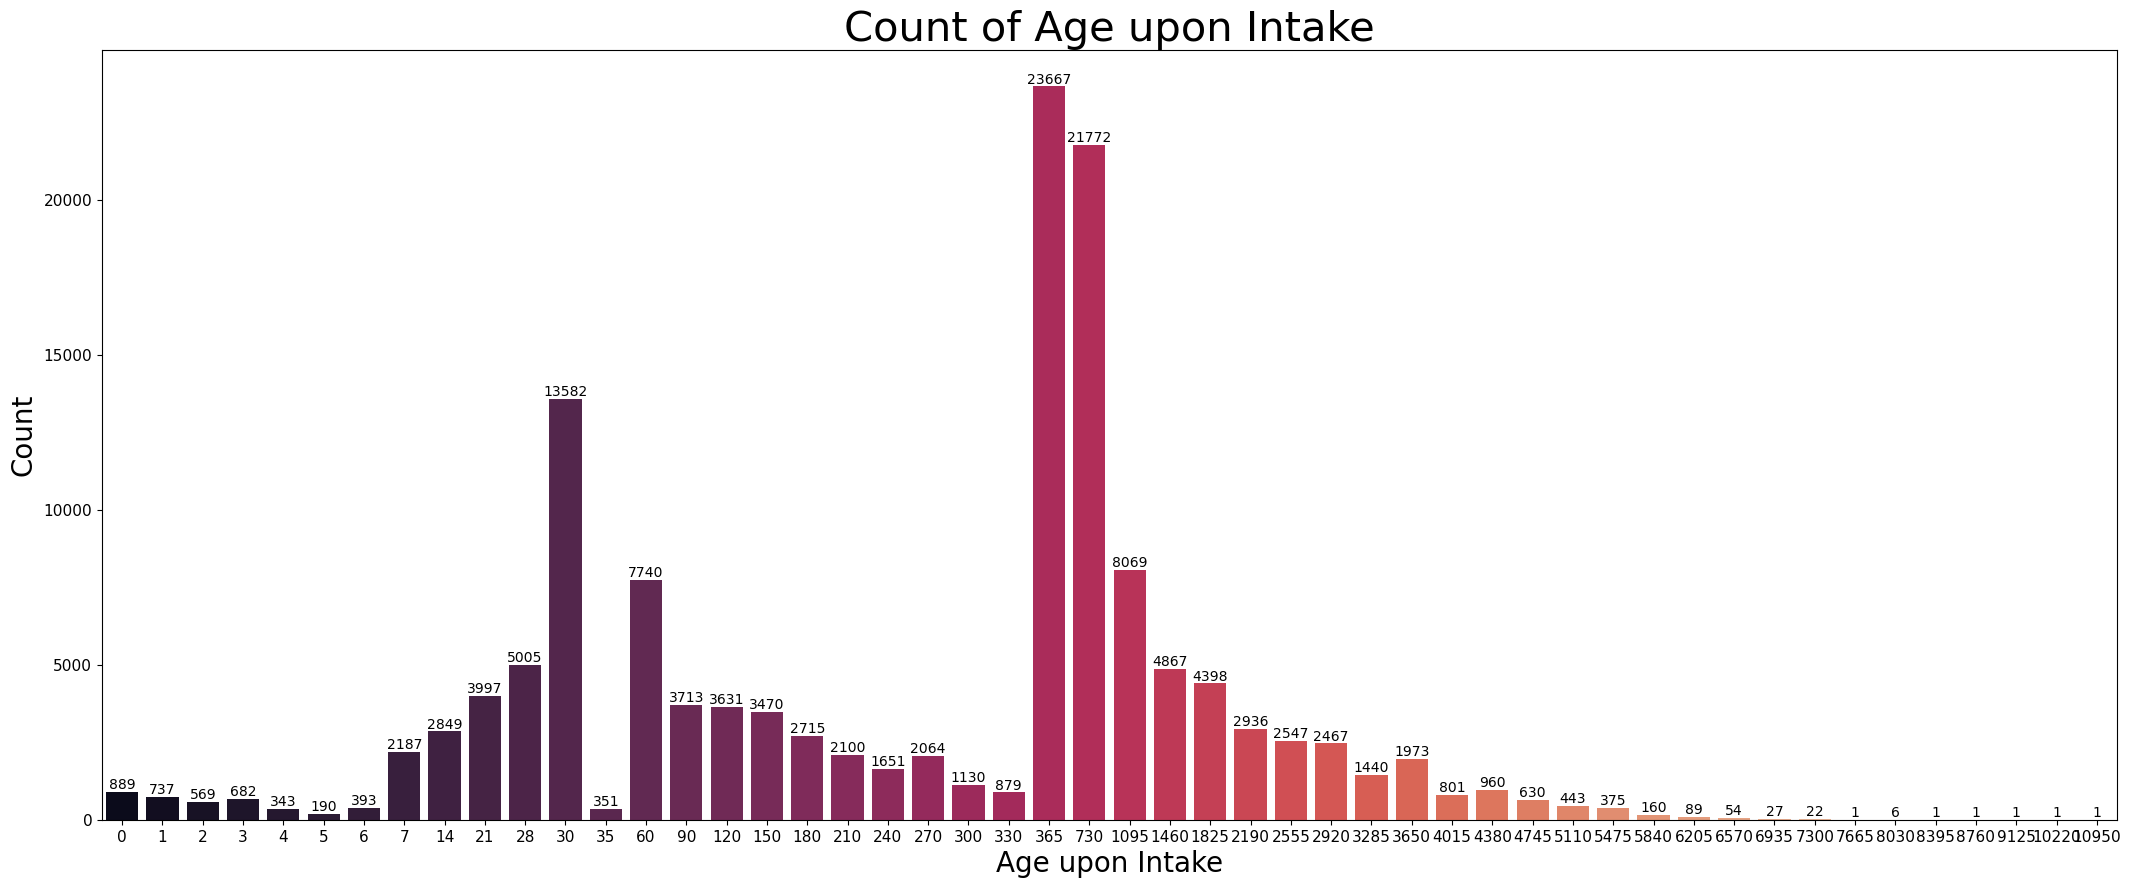

In [17]:
intake_age_for_bar = intakes['Age upon Intake'].value_counts().rename_axis('days_count').reset_index(name='count')
#display(intake_age_for_bar)

f, ax = plt.subplots(1, 1, figsize=(26, 10), sharex=True)
sns.barplot(x=intake_age_for_bar['days_count'], y=intake_age_for_bar['count'], palette="rocket")
ax.bar_label(ax.containers[0]) #print values over the columns
ax.set_ylabel("Count",fontsize=20) #name of y label
ax.set_xlabel("Age upon Intake", fontsize=20) #name of x label
ax.axes.set_title("Count of Age upon Intake",fontsize=30) #print title
ax.tick_params(labelsize=11) #size of values on the x and y axis


* Sloupcový graf není dobře čitelný kvůli velkému rozsahu hodnot, proto využijeme taky krabicový graf.

<AxesSubplot:xlabel='Age upon Intake'>

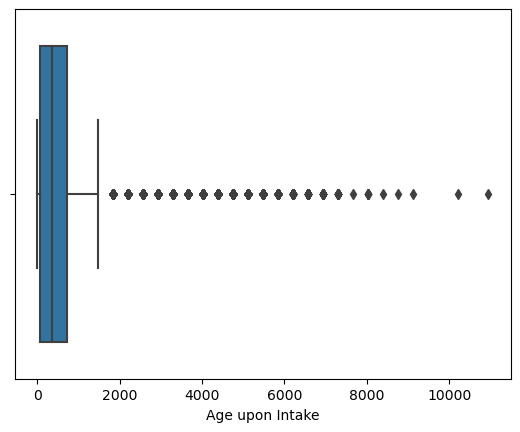

In [18]:
sns.boxplot(x=intakes['Age upon Intake'])

* Ze sloupcového grafu můžeme zjistit, že hodnota 365(1 rok) se objevuje nejčastěji. Z krabicového grafu se dá zjistit rozsah hodnot a anomální hodnoty. Nejvíc je hodnot v intervalu od 0 a přibližně do 700-1000. Sloupcový graf kazí jednotlivý hodnoty z intervalu od 2000 do 10000. V tom to intervalu hodnoty můžou být zastoupeny jednom jednou.

### Příznak ```Animal Type```

* Prozkoumáme příznak Animal Type. Ten je kategorický, proto změříme opět četnost a relativní četnost.
* Použitím ```mul(100)``` na relativní četnost převedeme hodnoty na trochu přehlednější pro tabulku četností.

In [19]:
intakes_anim_types = pd.DataFrame({
       'Count': intakes['Animal Type'].value_counts(),
       'Relative frequency in %': intakes['Animal Type'].value_counts(normalize=True).mul(100)
    })
display(intakes_anim_types)

,Count,Relative frequency in %
Dog,78136,56.384944
Cat,52380,37.798753
Other,7375,5.321989
Bird,661,0.476995
Livestock,24,0.017319


* Už vidíme že nejvíc je psů(56%) a nejméně je hospodářských zvířat(méně než 1%).
* Vizualizujeme to opět pomoci sloupcového grafu. Aby byl víc přehledný, použijeme ```bar_label()```, který zobrazí hodnoty jednotlivých sloupců.

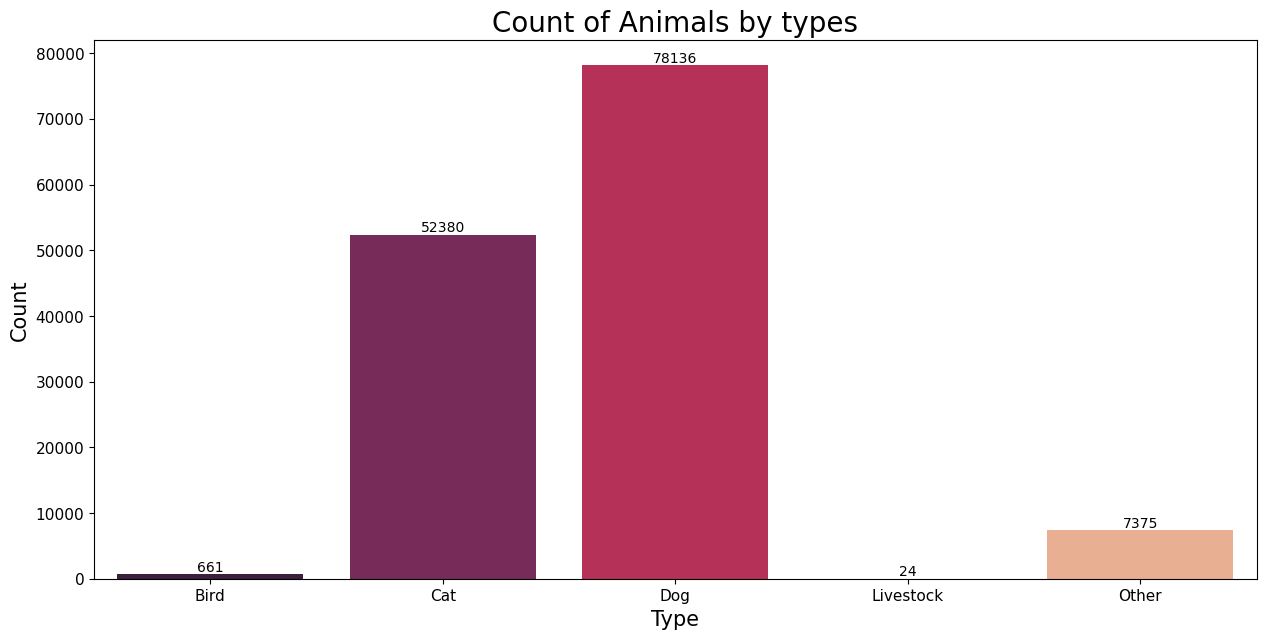

In [20]:
f, ax = plt.subplots(1, 1, figsize=(15, 7), sharex=True)
sns.barplot(x=intakes_anim_types.index, y=intakes_anim_types['Count'], palette="rocket")
ax.bar_label(ax.containers[0])
ax.set_ylabel("Count",fontsize=15)
ax.set_xlabel("Type", fontsize=15)
ax.axes.set_title("Count of Animals by types",fontsize=20)
ax.tick_params(labelsize=11)

### Příznak ```Intake Type```

* Prozkoumáme příznak ```Intake Type```. Ten je kategorický, proto zaměříme opět četnost a relativní četnost.

In [21]:
intakes_types = pd.DataFrame({
       'Count': intakes['Intake Type'].value_counts(),
       'Relative frequency in %': intakes['Intake Type'].value_counts(normalize=True).mul(100)
    })
display(intakes_types)

,Count,Relative frequency in %
Stray,95276,68.753608
Owner Surrender,28580,20.624062
Public Assist,8346,6.022688
Wildlife,5375,3.878738
Abandoned,740,0.534003
Euthanasia Request,259,0.186901


* Z tabulky četnosti vidíme, že asi 69% zvířat jsou zatoulané a jenom 0.1% potřebuje eutanazii.
* Vizualizujeme to opět pomoci sloupcového grafu. Aby byl víc přehledný, použijeme bar_label(), který zobrazí hodnoty jednotlivých sloupců.

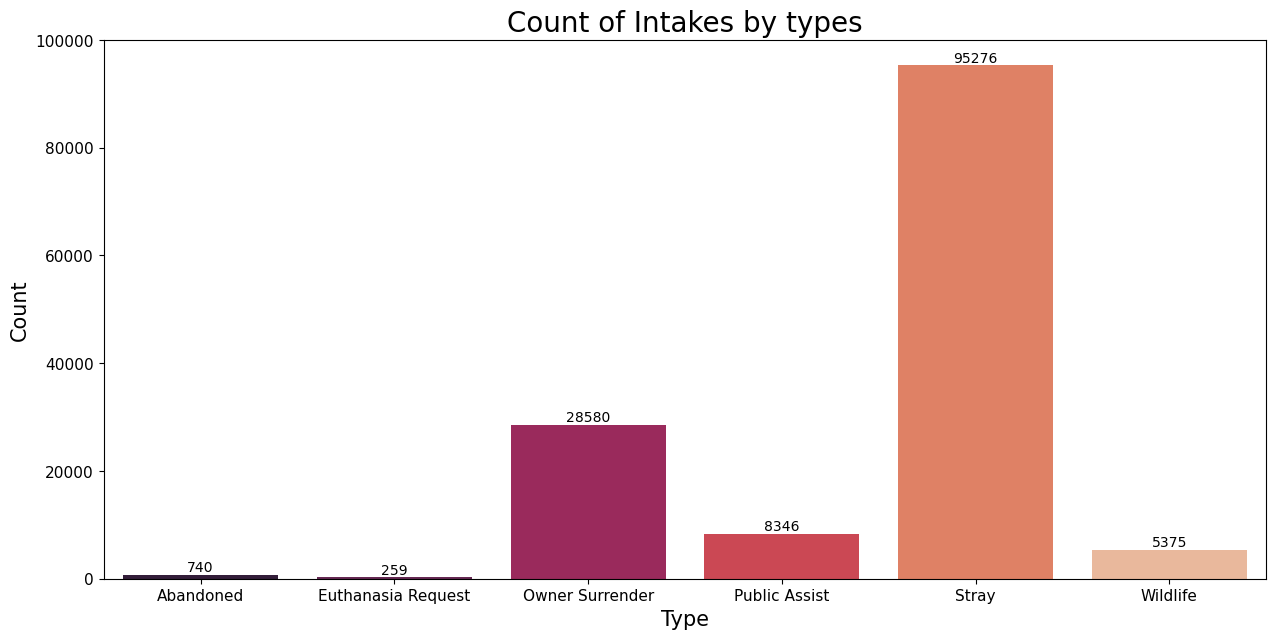

In [22]:
f, ax = plt.subplots(1, 1, figsize=(15, 7), sharex=True)
sns.barplot(x=intakes_types.index, y=intakes_types['Count'], palette="rocket")
ax.bar_label(ax.containers[0])
ax.set_ylabel("Count",fontsize=15)
ax.set_xlabel("Type", fontsize=15)
ax.axes.set_title("Count of Intakes by types",fontsize=20)
ax.tick_params(labelsize=11)

### Příznak ```Sex upon Intake```

* Prozkoumáme příznak ```Sex upon Intake```. Ten je kategorický, proto zaměříme opět četnost a relativní četnost.

In [23]:
intakes_sex = pd.DataFrame({
       'Count': intakes['Sex upon Intake'].value_counts(),
       'Relative frequency in %': intakes['Sex upon Intake'].value_counts(normalize=True).mul(100)
    })
display(intakes_sex)

,Count,Relative frequency in %
Intact Male,45634,32.930666
Intact Female,43306,31.250722
Neutered Male,20832,15.032906
Spayed Female,17735,12.798031
Unknown,11069,7.987675


* Oproti předchozím příznakům, ```Sex upon Intake``` je zastoupen docela rovnoměrně. ```Intact Male``` a ```Intact Female``` se liší jenom na 1.7%.
* Teď konečně můžeme použit na vizualizací koláčový graf, který bude uvádět relativní četnost jednotlivých pohlaví.

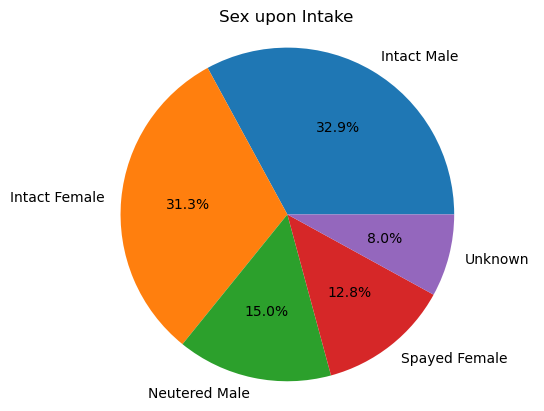

In [24]:
fig1, ax1 = plt.subplots()

ax1.pie(intakes_sex['Relative frequency in %'], labels=intakes_sex.index, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title("Sex upon Intake")

plt.show()

### Bivariační deskriptivní statistiky

### Příznaky ```Sex upon Intake``` a ```Animal Type```

* Pomocí bivariačnich deskriptivních statistik pokusíme se prozkoumat vztah mezi ```Sex upon Intake``` a ```Animal Type```z datasetu ```intakes```.
* Oba příznaky jsou kategorické, proto použijeme frekvenční tabulku. Vytvoříme ji pomoci ```pd.crosstab()```.
* Na vizualizací použijeme heatmapu z balíčku ```seaborn```.

<AxesSubplot:xlabel='Animal Type', ylabel='Sex upon Intake'>

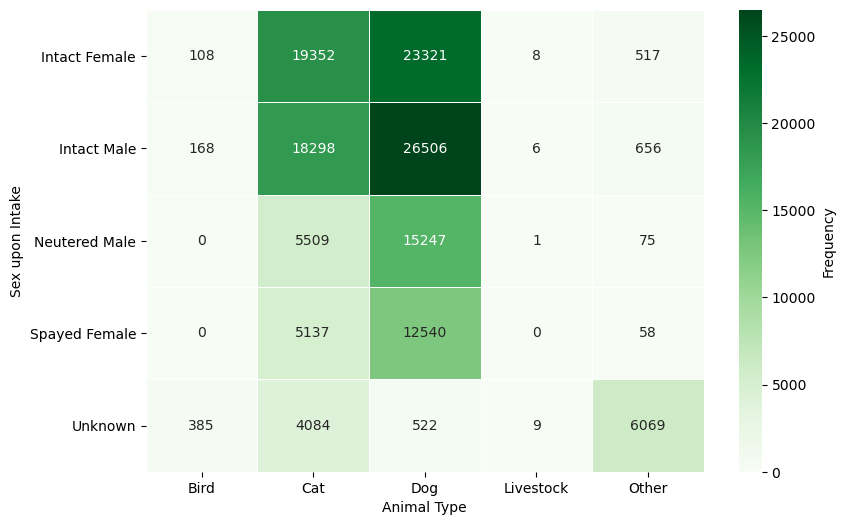

In [25]:
frequency_table = pd.crosstab(intakes['Sex upon Intake'], intakes['Animal Type'])

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(frequency_table, annot=True, fmt=".0f", cmap="Greens", linewidth=.5, cbar_kws={'label': 'Frequency'})

* Co můžeme z heatmapy zjistit? 
* Psy a kočky mají většinou pohlaví ```Intact Female``` nebo ```Intact Male```. 
* ```Neutered Male``` a ```Sepayed Female``` mají u koček a psu rovnoměrné rozdělení. Ale počet neznámých je výrazně větší u koček než u psu. 
* Jiný typy zvířat většinou mají neznáme pohlaví. 
* Ve výsledku máme, že mezi různými zvířaty nejvíc je ```Intact Male/Female``` ale jenom u ptáků a jiných je počet neznámých větší než počet ostatních pohlaví.

# Otázky

### Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? 

* ```Outcome Type``` a ```Intake Type``` jsou kategorické příznaky,  proto zase použijeme heatmapu. 
* Před vytvořením frekvenční tabulky, musíme spojit dva datasety(```intakes``` a ```outcomes```) pomocí funkce ```merge()``` z parametrem ```inner```(defaultni parametr). Ten spoji tabulky na základě přítomnosti záznamu jak v prvním tak i v druhem datasetu. Spojením dvou tabulek docílíme toho, že každé zvířete bude mít jak Outcome Type tak i Intake Type.

<AxesSubplot:xlabel='Outcome Type', ylabel='Intake Type'>

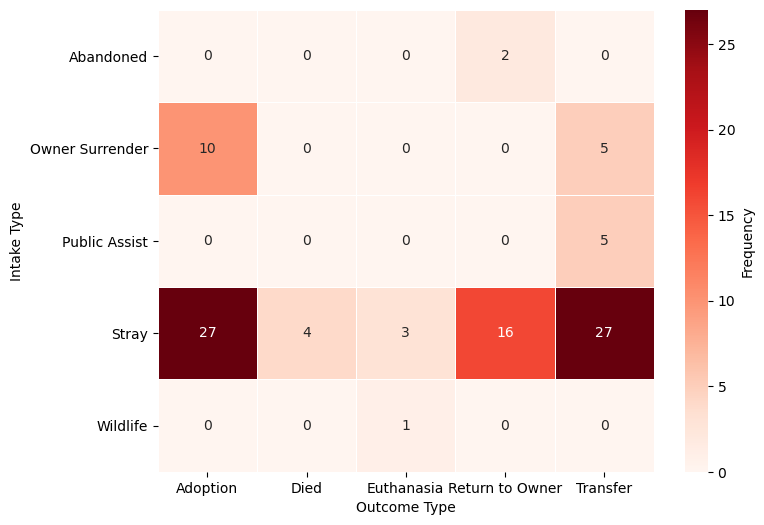

In [26]:
anim_type = intakes.merge(outcomes)

frequency_table_type_type = pd.crosstab(anim_type['Intake Type'], anim_type['Outcome Type'])
fig, ax2 = plt.subplots(figsize=(8, 6))
sns.heatmap(frequency_table_type_type, annot=True, fmt=".0f", cmap="Reds", linewidth=.5, cbar_kws={'label': 'Frequency'})

* Z heatmapy můžeme snadno zjistit, že  ```Intake Type``` závisí na ```Outcome Type```. 
* Zatoulané zvíře nejspíš bude mít adopci(27 ze 100)  nebo transfer(27 ze 100) a taky ve 16% (16 ze 100) případu se vrátí k vlastníkovi. 
* Zvíře odevzdané vlastníkem v 10% (10 ze 100) případu bude taky mít adopci.

### Hraje věk zvířete roli při adopci?

* Aby zodpovědět na otázku, musíme vybrat z datasetu ```outcomes``` řádky ve kterých ```Outcome Type``` je ```Adoption```. 
* Pak v novou tabulku nepočítáme počet výskytu jednotlivého věku a vizualizujeme to pomoci sloupcového grafu.

,days,count
0,60,14204
1,365,10241
2,730,8491
3,90,4950
4,1095,3120


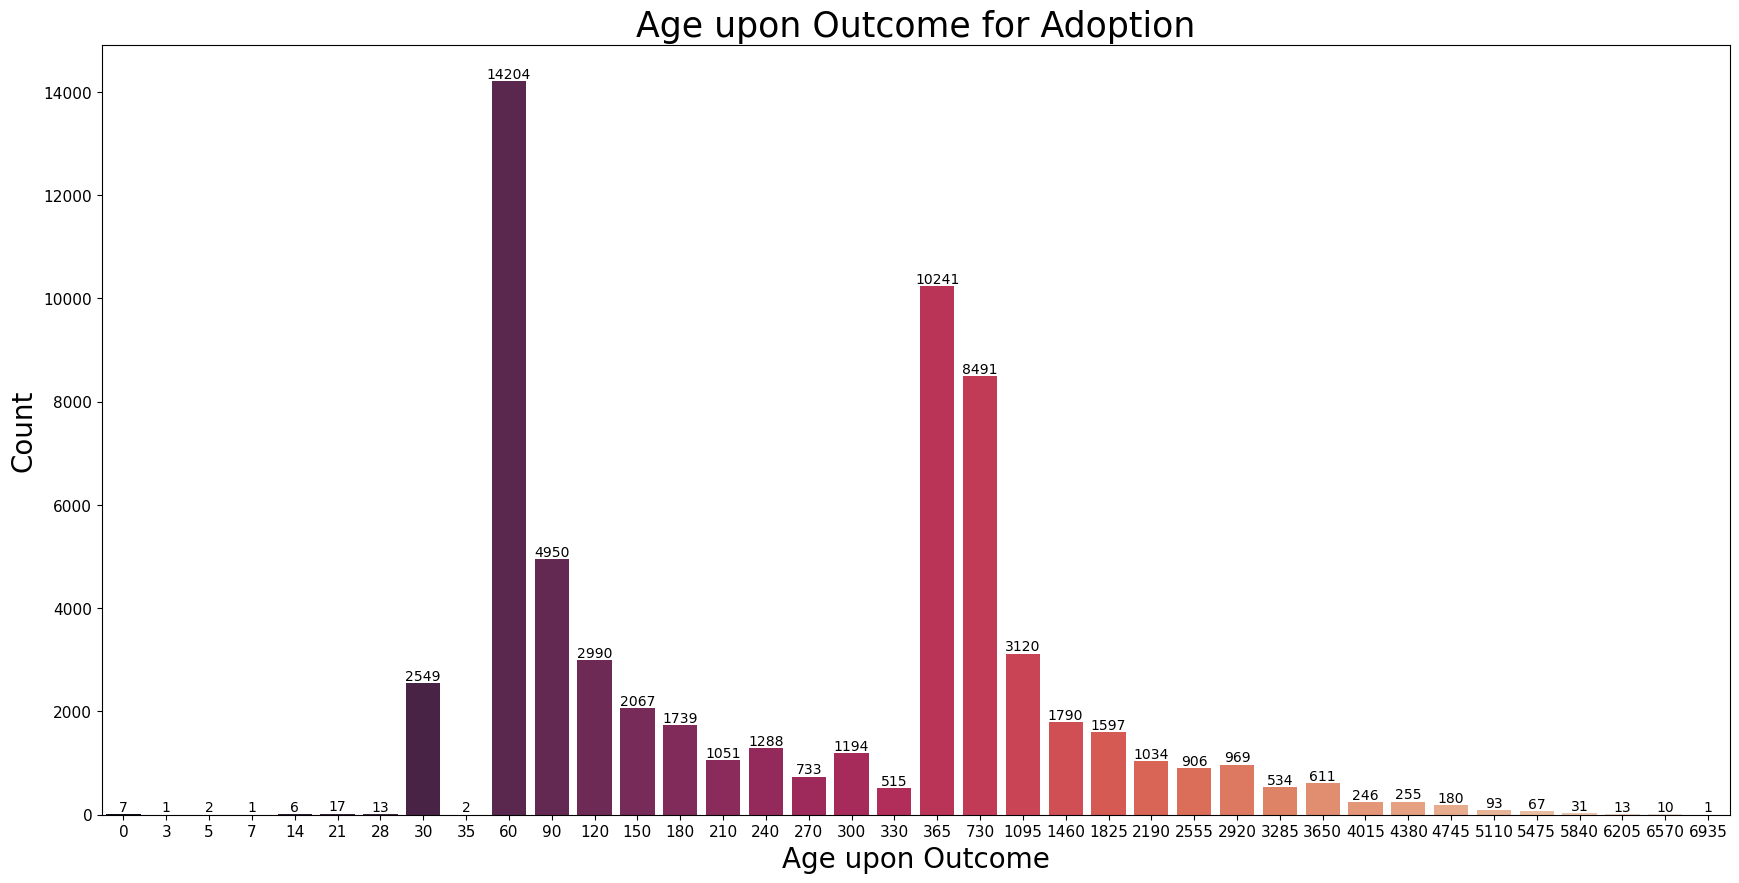

In [27]:
age_type = outcomes[outcomes['Outcome Type'] == "Adoption"]
age = age_type['Age upon Outcome'].value_counts().rename_axis('days').reset_index(name='count')
display(age.head())


f, ax = plt.subplots(1, 1, figsize=(21, 10), sharex=True)
sns.barplot(x=age['days'], y=age['count'], palette="rocket")
ax.bar_label(ax.containers[0])
ax.set_ylabel("Count",fontsize=20)
ax.set_xlabel("Age upon Outcome", fontsize=20)
ax.axes.set_title("Age upon Outcome for Adoption",fontsize=25)
ax.tick_params(labelsize=11)

* Z grafu můžeme vidět, že nejpopulárnější věk pro adopci je 60 dnů( 2 měsíce). 
* Hodně taky vyskytuje 365 dnů( 1 rok) a 730 dnů( 2 roky). Novorozených a starých zvířat adoptuji mnohem méně.

### Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

* Pro práci s obdobím musíme napsat novou funkci ```season_freq``` která převede jednotlivé měsíce na 1-4 (zima, jaro, léto, podzim). 
* Vybereme z původního datasetu intakes ze sloupce ```DateTime``` jenom měsíc. 
* Aplikujeme funkci ```season_freq``` na sloupec s měsíci a pomoci ```value_counts()``` naměříme výskyty jednotlivých měsíců.  
* Vizualizujeme výsledky pomoci tabulky  a sloupcového grafu.

,Season,Count
0,3,37613
1,4,36153
2,2,35596
3,1,29214


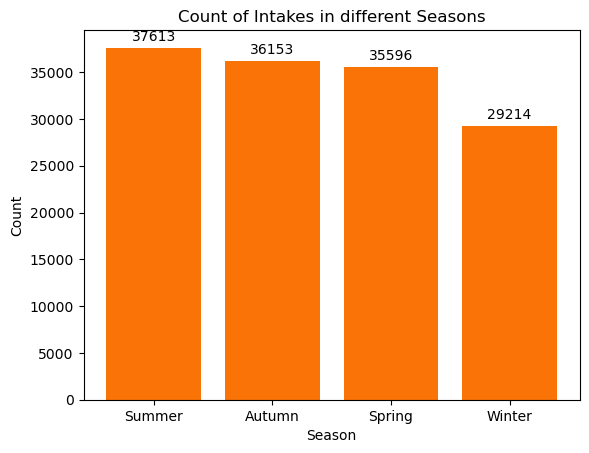

In [28]:
def season_freq(month):
    if month == 12 or month == 1 or month == 2:
        return 1
    if month == 3 or month == 4 or month == 5:
        return 2
    if month == 6 or month == 7 or month == 8:
        return 3
    if month == 9 or month == 10 or month == 11:
        return 4

month = intakes['DateTime'].dt.month
month = month.apply(season_freq)
season_count = month.value_counts().rename_axis('Season').reset_index(name='Count')
display(season_count)


fig, ax = plt.subplots()
index = ['Summer', 'Autumn', 'Spring', 'Winter']
seasons = ax.bar(index, season_count["Count"], color='xkcd:orange')

ax.set_ylabel('Count')
ax.set_xlabel('Season')
ax.set_title('Count of Intakes in different Seasons')
ax.set_xticks(index)

ax.bar_label(seasons, padding=3)

plt.show()

* Z grafu můžeme zjistit, že příjmy v rámci roku jsou rozložení docela rovnoměrně. Ale nejvíc příjmu je v létě a nejmíň v zimě.
* Podíváme se taky na příjmy v rámci jednotlivých měsíců. Na to použijeme funkci ```Freq_Year_Month()```, kterou jsme napsali dřív.

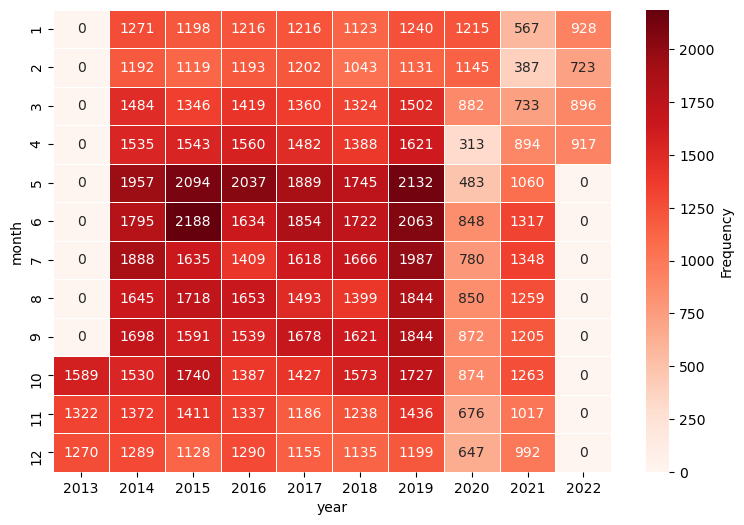

In [29]:
Freq_Year_Month()

*  Vidíme že největší počet příjmu byl v květnu a červnu roku 2015 a 2019. 
*  Pomoci hodnoty 0 můžeme odhadnout časový interval pro dataset intakes. Je to od října roku 2013 do dubna roku 2022.

### 10 nejpopulárnějších zvířat kterých přijali s typem ```Other```

* Z datasetu intakes vybereme zvířat z typem ```Other```. 
* Vybereme jenom sloupec ```Breed``` a spočítáme počet jednotlivých druhu. 
* Vybereme 10 druhu z největším počtem( 10 prvních záznamů).

In [30]:
other_animals = intakes[intakes['Animal Type'] == 'Other']
other_animals =  other_animals['Breed']
other_animals = other_animals.value_counts().rename_axis('Type').reset_index(name='Count')

other_animals = other_animals[other_animals.index < 10]

display(other_animals)

,Type,Count
0,Bat Mix,1756
1,Bat,1726
2,Raccoon,553
3,Raccoon Mix,539
4,Rabbit Sh Mix,338
5,Guinea Pig,328
6,Rabbit Sh,210
7,Opossum Mix,191
8,Opossum,164
9,Guinea Pig Mix,152


* Vizualizujeme výsledky pomoci sloupcového grafu.

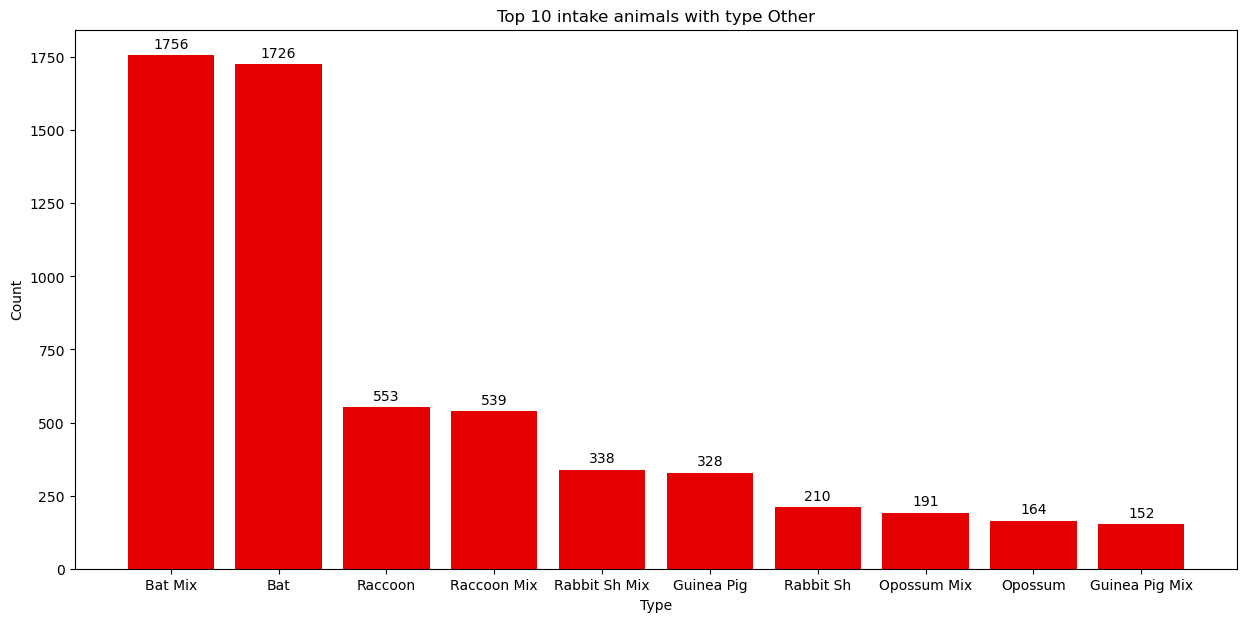

In [31]:
fig, ax = plt.subplots(figsize=(15,7))

seasons = ax.bar(other_animals['Type'], other_animals['Count'], color='xkcd:red')

ax.set_ylabel('Count')
ax.set_xlabel('Type')
ax.set_title('Top 10 intake animals with type Other')
ax.set_xticks(other_animals['Type'])

ax.bar_label(seasons, padding=3)

plt.show()

* A už vidíme že mezi přijatými je nejvíc netopýrů. Pak jdou mývaly, králíky, morčata a vačice.

### Jaké druhy zvířat z typem Other nejvíc adoptuji?

* Vybereme zvířat které mají ```Outcome Type``` - ```Adoption``` **a zároveň** mají ```Animal Type``` - ```Other```. Na to využijeme operátor ```&```. 
* Vybereme jenom řádek ```Breed``` a spočítáme počet jednotlivých druhu zvířat. 
* Odstraníme nulové hodnoty a podíváme se na výslednou tabulku.

In [32]:
adopt_type = outcomes[(outcomes['Outcome Type'] == "Adoption") & (outcomes['Animal Type'] == 'Other')]
adopt_type =  adopt_type['Breed']
adopt_type = adopt_type.value_counts().rename_axis('Breed').reset_index(name='Count')
adopt_type = adopt_type[adopt_type['Count'] != 0]
display(adopt_type)

,Breed,Count
0,Guinea Pig,150
1,Rabbit Sh Mix,106
2,Rabbit Sh,94
3,Ferret,26
4,Californian Mix,21
...,...,...
75,Dutch Mix,1
76,Cinnamon,1
77,Polish Mix,1
78,Lizard Mix,1


* Vidíme, že na konci datasetu už vyskytují jenom unikátní druhy zvířat(jejich počet je roven 1) proto budeme uvažovat jenom prvních 15 druhu zvířat.
* Vizualizujeme to opět pomoci sloupcového grafu.

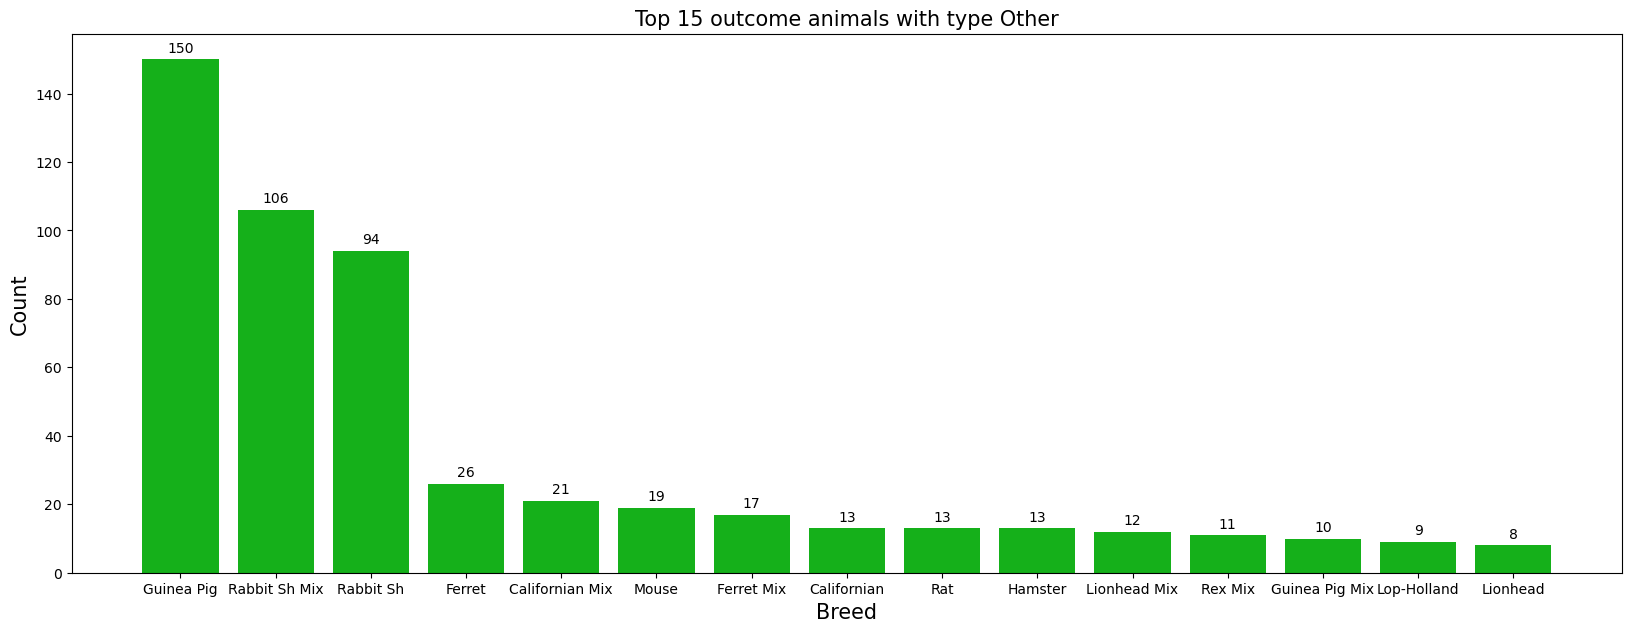

In [33]:
adopt_type = adopt_type[adopt_type.index < 15]

fig, ax = plt.subplots(figsize=(20,7))

outcome_types = ax.bar(adopt_type['Breed'], adopt_type['Count'], color='xkcd:green')

ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Breed', fontsize=15)
ax.set_title('Top 15 outcome animals with type Other', fontsize=15)
ax.set_xticks(adopt_type['Breed'])

ax.bar_label(outcome_types, padding=3)

plt.show()


* Můžeme jistě říct, že lidi nejčastěji adoptuji nebo morče nebo králíka. Těch v porovnání s ostatními je výrazně víc.
* Ale pamatujeme si, že nejvíc mezi přijatými bylo netopýrů a mývalů. Co se s nimi v takovém případě stává? Pokusím se na to odpovědět následující otázkou.

### Jaký Outcome Type mají Netopýři a Mývaly?

* Pamatujeme si, že netopýrů existuje jenom dva druhy, proto využitím operátoru ```&``` a ```|``` nalezněme všech netopýrů a zapíšeme do bat_type sloupec ```Outcome Type```. Spočítáme počet jednotlivých typu.
* Pro přehlednost budeme uvažovat typy pro které je alespoň 1 záznam.
* Na virtualizaci, použijeme tabulky četnosti.

In [34]:
bat_type = outcomes[(outcomes['Animal Type'] == 'Other') & ((outcomes['Breed'] == 'Bat Mix') | (outcomes['Breed'] == 'Bat'))]
bat_type =  bat_type['Outcome Type']
bat_type = bat_type.value_counts().rename_axis('Outcome Type').reset_index(name='Count')
bat_type = bat_type[bat_type['Count'] != 0]
display(bat_type)

,Outcome Type,Count
0,Euthanasia,3044
1,Disposal,328
2,Died,103
3,Relocate,1


* Vidíme že bohužel většina má ```Outcome Type```: ```Euthanasia``` nebo ```Disposal``` nebo ```Died```.
* Pokusíme se zjistit v jakem stavu jich většinou přijímají. Provedeme to samé ale na datasetu intakes.

In [35]:
bat_type_intake = intakes[(intakes['Animal Type'] == 'Other') & ((intakes['Breed'] == 'Bat Mix') | (intakes['Breed'] == 'Bat'))]
bat_type_intake =  bat_type_intake['Intake Condition']
bat_type_intake = bat_type_intake.value_counts().rename_axis('Intake Condition').reset_index(name='Count')
bat_type_intake = bat_type_intake[bat_type_intake['Count'] != 0]
display(bat_type_intake)

,Intake Condition,Count
0,Normal,2851
1,Sick,395
2,Injured,208
3,Nursing,20
4,Neonatal,3
5,Medical,2
6,Aged,1
7,Feral,1
8,Other,1


* Kupodivu většina má stav ```Normal```. Zajímavě, proč v takovém případě ve výsledku většině netopýrů dělají eutanasiu?
* Stejně prozkoumáme data o mývalech. Zde použijeme DataFrame aby porovnat četnost a relativní četnost.

In [36]:
raccoon_type = outcomes[(outcomes['Animal Type'] == 'Other') & ((outcomes['Breed'] == 'Raccoon Mix') | (outcomes['Breed'] == 'Raccoon'))]
raccoon_type =  raccoon_type['Outcome Type']

raccoon_outcome = pd.DataFrame({
       'Frequency': raccoon_type.value_counts(),
       'Relative frequency in %': raccoon_type.value_counts(normalize=True).mul(100)
    })


raccoon_outcome = raccoon_outcome[raccoon_outcome['Frequency'] != 0]

display(raccoon_outcome)

,Frequency,Relative frequency in %
Euthanasia,1001,91.834862
Disposal,61,5.596330
Died,20,1.834862
Relocate,6,0.550459
Transfer,2,0.183486


In [37]:
raccoon_type_intake = intakes[(intakes['Animal Type'] == 'Other') & ((intakes['Breed'] == 'Raccoon Mix') | (intakes['Breed'] == 'Raccoon'))]
raccoon_type_intake =  raccoon_type_intake['Intake Condition']

raccoon_intake = pd.DataFrame({
       'Frequency': raccoon_type_intake.value_counts(),
       'Relative frequency in %': raccoon_type_intake.value_counts(normalize=True).mul(100)
    })
raccoon_intake = raccoon_intake[raccoon_intake['Frequency'] != 0]
display(raccoon_intake)

,Frequency,Relative frequency in %
Sick,794,72.710623
Injured,184,16.849817
Normal,108,9.890110
Nursing,5,0.457875
Other,1,0.091575


* V případě mývalů je trochu jiná situace. 72% přijatých mývalů jsou nemocné, 16% mají zranění a jenom 9% mají stav ```Normal```. Zde už je zřejmé proč až 91% mývalů mají ```Outcome Type```  ```Euthanasia```.

## Zdroje

* [Matplotlib BarPlot](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py)
* [Seaborn BarPlot](https://seaborn.pydata.org/examples/palette_choices.html)
* [Matplotlib PiePlot](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)
* [Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmaps)
* [Přednáška a cvičení "Základní metody analýzy dat"](https://courses.fit.cvut.cz/BI-VIZ/lectures/files/04/04-prednaska.pdf)
* [Scatterplot z Matplotlibu část pro přidaní os x a y](https://www.geeksforgeeks.org/how-to-create-scatterplot-with-both-negative-and-positive-axes/)
* Taky jsem použil ```eda_heart_attack.ipynb``` ze cvičení